# Mapeando el Universo

# Introducción al aprendizaje automático

## **1)** Tomar el dataset "limpio" obtenido del práctico anterior y considerar algunos de los siguientes conjuntos de variables
* modelMag_*, colores_modelMag, devRad_*
* modelMag_*, colores_modelMag, expRad_*
* petroMag_*, colores_petroMag, petroRad_*, petroR50_*, petroR90_*

### Lectura de datos

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Iportamos librerìas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psutil


from sklearn import datasets, linear_model
from sklearn.linear_model import (LinearRegression, SGDClassifier, Ridge, SGDRegressor)
from sklearn.preprocessing import (PolynomialFeatures, MinMaxScaler)
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import (train_test_split, KFold, GridSearchCV)
from sklearn.metrics import (mean_squared_error, r2_score, precision_score, recall_score, f1_score, confusion_matrix)
from sklearn.preprocessing import StandardScaler
import itertools

# Perceptron
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

In [4]:
# Importamos librerìas posiblemente faltantes
import os
import gc
import sys
import pkg_resources
#if 'sidetable' not in {pkg.key for pkg in pkg_resources.working_set}:
#    !pip install sidetable
if 'psutil' not in {pkg.key for pkg in pkg_resources.working_set}:
    !pip install psutil
#if 'xgboost' not in {pkg.key for pkg in pkg_resources.working_set}:
#    !pip install xgboost
if 'scikit-learn' not in {pkg.key for pkg in pkg_resources.working_set}:
    !pip install scikit-learn
in_colab = 'google.colab' in sys.modules

In [5]:
def Memory():
    """Imprime la cantidad de memoria RAM utilizada por el proceso 
    hasta el momento, en GB"""
    gc.collect()
    process = psutil.Process(os.getpid())
    print('Memoria actual utilizada: %.2f GB' %(process.memory_full_info().rss*1e-9))
    return

In [5]:
filename = "../../dataset/data_filter.csv"

In [6]:
data = pd.read_csv(filename,index_col=0)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608921 entries, 957075158303008768 to 957064712942544896
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   z                               608921 non-null  float64
 1   velDisp                         608921 non-null  float64
 2   ra                              608921 non-null  float64
 3   dec                             608921 non-null  float64
 4   subClass                        249461 non-null  object 
 5   modelMag_u                      608921 non-null  float64
 6   modelMag_g                      608921 non-null  float64
 7   modelMag_r                      608921 non-null  float64
 8   modelMag_i                      608921 non-null  float64
 9   modelMag_z                      608921 non-null  float64
 10  petroMag_u                      608921 non-null  float64
 11  petroMag_g                      608921 non-null  

In [9]:
data.describe()

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,...,subClass_STARFORMING_BROADLINE,subClass_null,modelColor_ug,modelColor_gr,modelColor_ri,modelColor_iz,petroColor_ug,petroColor_gr,petroColor_ri,petroColor_iz
count,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,...,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000
mean,0.104342,135.548575,184.663017,25.119669,19.486345,17.820442,16.964847,16.554727,16.264905,19.482649,...,0.001363,0.590323,1.665904,0.855595,0.410120,0.289823,1.615551,0.831818,0.386924,0.233235
std,0.053560,74.773948,58.737151,19.010990,0.960267,0.763514,0.675561,0.673814,0.707239,1.157991,...,0.036895,0.491775,0.458326,0.296790,0.097406,0.179993,0.799674,0.352273,0.220364,0.373315
min,-0.006568,0.000000,0.001718,-11.252825,14.226100,13.574420,13.890400,13.758980,12.382540,11.984880,...,0.000000,0.000000,-9.993700,-6.423580,-4.947020,-13.819450,-19.256860,-3.612750,-22.090000,-21.056590
25%,0.066619,83.816160,151.925664,9.675502,18.901570,17.420410,16.635270,16.226100,15.916920,18.858070,...,0.000000,0.000000,1.343030,0.675080,0.373660,0.248440,1.239470,0.639410,0.350710,0.188920
50%,0.097589,131.624900,185.461795,23.769607,19.528360,17.971860,17.157480,16.737970,16.430190,19.460280,...,0.000000,1.000000,1.718690,0.875560,0.422390,0.315140,1.542990,0.843520,0.404890,0.271040
75%,0.136380,181.387900,220.488190,39.551447,20.146590,18.358100,17.474630,17.051040,16.752250,20.062810,...,0.000000,1.000000,1.938110,1.022410,0.463140,0.353350,1.817090,0.995580,0.445390,0.324840
max,1.000208,850.000000,359.997379,70.268882,30.599800,28.401410,25.141300,20.176000,28.553240,41.270800,...,1.000000,1.000000,13.198990,13.050000,9.648550,5.005140,24.066280,19.110600,4.211290,19.374340


In [10]:
data.columns

Index(['z', 'velDisp', 'ra', 'dec', 'subClass', 'modelMag_u', 'modelMag_g',
       'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroMag_u', 'petroMag_g',
       'petroMag_r', 'petroMag_i', 'petroMag_z', 'deVRad_u', 'deVRad_g',
       'deVRad_r', 'deVRad_i', 'deVRad_z', 'expRad_u', 'expRad_g', 'expRad_r',
       'expRad_i', 'expRad_z', 'petroRad_u', 'petroRad_g', 'petroRad_r',
       'petroRad_i', 'petroRad_z', 'spiral', 'elliptical', 'uncertain',
       'subClass_AGN', 'subClass_AGN_BROADLINE', 'subClass_BROADLINE',
       'subClass_STARBURST', 'subClass_STARBURST_BROADLINE',
       'subClass_STARFORMING', 'subClass_STARFORMING_BROADLINE',
       'subClass_null', 'modelColor_ug', 'modelColor_gr', 'modelColor_ri',
       'modelColor_iz', 'petroColor_ug', 'petroColor_gr', 'petroColor_ri',
       'petroColor_iz'],
      dtype='object')

### Para liberar memoria reducimos en lo posible el dtype

In [7]:
from fail_safe_parallel_memory_reduction import Reducer

reducer = Reducer(n_jobs=1)
data = reducer.reduce(data)

reduced df from 232.2849 MB to 97.5600 MB in 1.40 seconds


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608921 entries, 957075158303008768 to 957064712942544896
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   z                               608921 non-null  float64
 1   velDisp                         608921 non-null  float64
 2   ra                              608921 non-null  float64
 3   dec                             608921 non-null  float64
 4   subClass                        249461 non-null  object 
 5   modelMag_u                      608921 non-null  float64
 6   modelMag_g                      608921 non-null  float64
 7   modelMag_r                      608921 non-null  float64
 8   modelMag_i                      608921 non-null  float64
 9   modelMag_z                      608921 non-null  float64
 10  petroMag_u                      608921 non-null  float64
 11  petroMag_g                      608921 non-null  

## Set de datos

In [12]:
#-- Jugar con esta lista, agregar o sacar o cambiar las columnas.
#filter_col
filter_col_01=[];
filter_col_01.extend([col for col in data if col.startswith(('modelMag', 'modelColor','deVRad','expRad','velDisp', 'z'))])
#filter_colp
filter_col_02=[]
filter_col_02.extend([col for col in data if col.startswith(('petroMag', 'petroColor','petroRad','velDisp', 'z'))])

## filter_col_sre 
filter_col_03=[];
filter_col_03.extend([col for col in data if col.startswith(('modelMag', 'modelColor','velDisp', 'z'))])
#filter_col07
filter_col_04=[]
filter_col_04=[ 'z','petroColor_gr', 'modelColor_ri', 'modelColor_gr','petroMag_r','petroMag_g','petroMag_u',
                    'modelMag_i','modelMag_g','modelMag_u','modelMag_r','velDisp']


In [9]:
print(filter_col_01)
print(filter_col_02)
print(filter_col_03)
print(filter_col_04)

['z', 'velDisp', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'deVRad_u', 'deVRad_g', 'deVRad_r', 'deVRad_i', 'deVRad_z', 'expRad_u', 'expRad_g', 'expRad_r', 'expRad_i', 'expRad_z', 'modelColor_ug', 'modelColor_gr', 'modelColor_ri', 'modelColor_iz']
['z', 'velDisp', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'petroRad_u', 'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z', 'petroColor_ug', 'petroColor_gr', 'petroColor_ri', 'petroColor_iz']
['z', 'velDisp', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'modelColor_ug', 'modelColor_gr', 'modelColor_ri', 'modelColor_iz']
['z', 'petroColor_gr', 'modelColor_ri', 'modelColor_gr', 'petroMag_r', 'petroMag_g', 'petroMag_u', 'modelMag_i', 'modelMag_g', 'modelMag_u', 'modelMag_r', 'velDisp']


### Variables usadas vs redshift

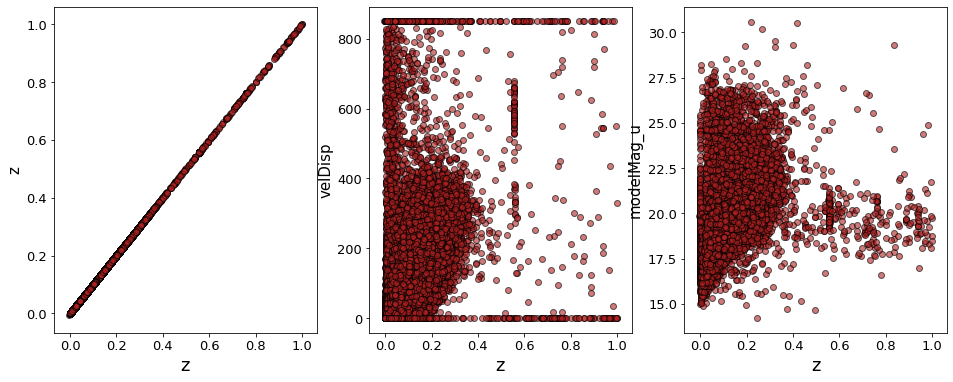

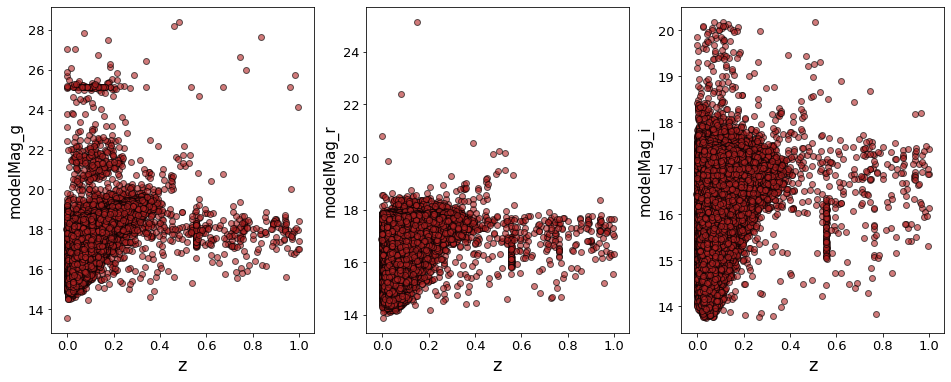

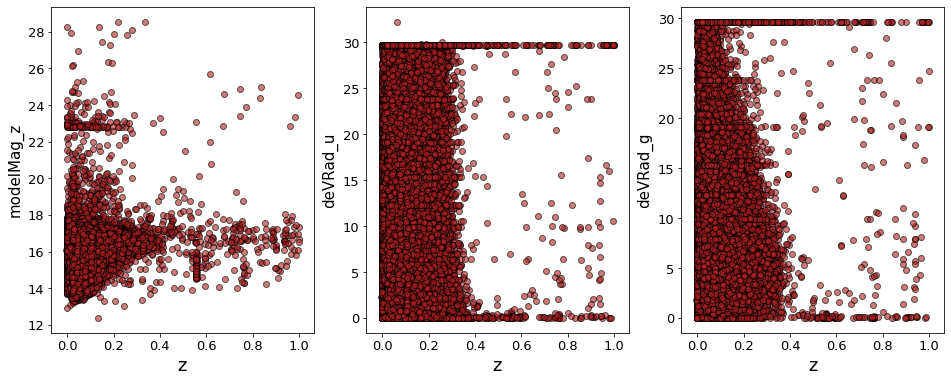

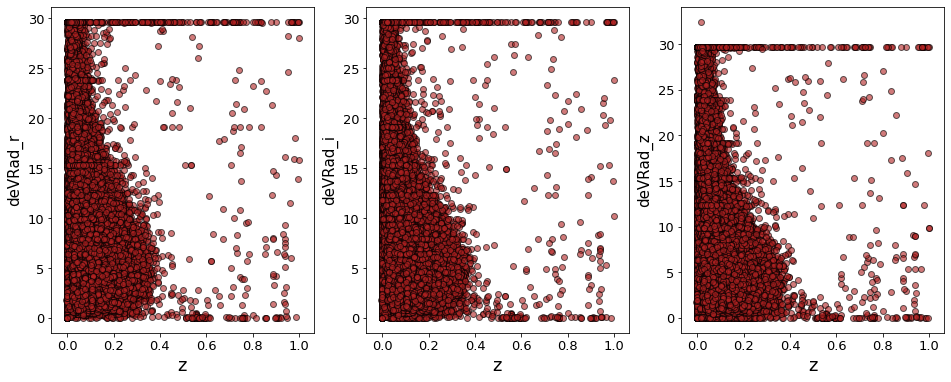

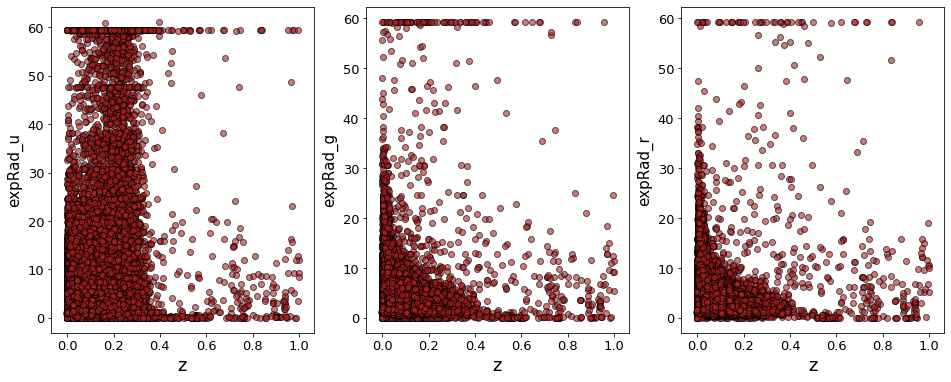

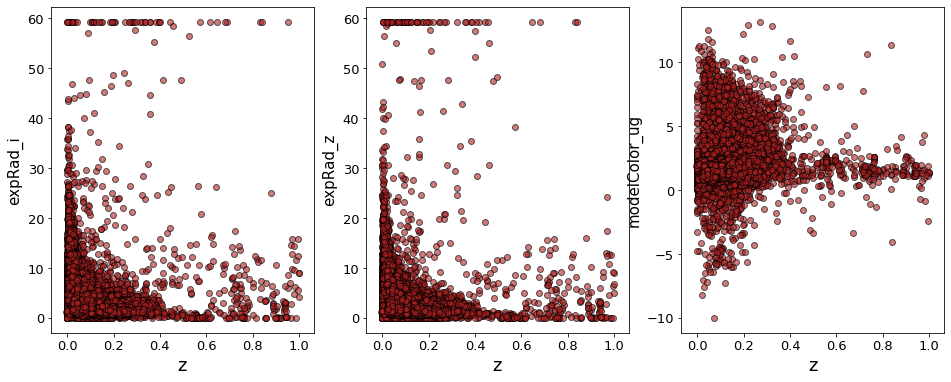

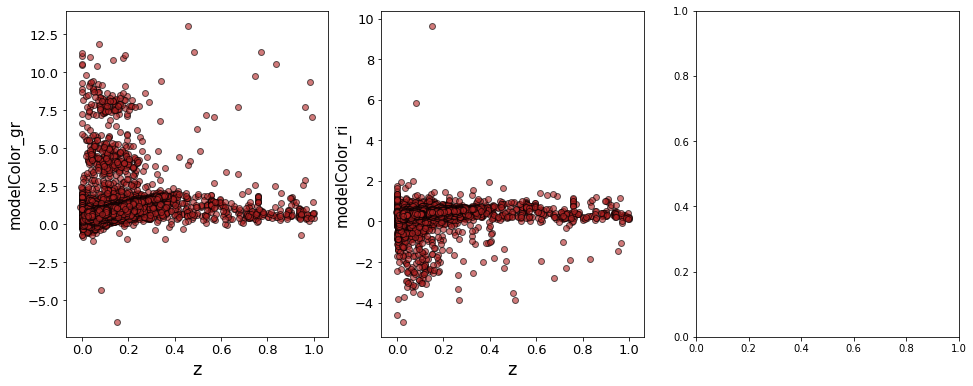

In [14]:
j=0
for i in filter_col_01[:-1]:
#    print(j)
    if j > 2:
        j=0        
    if j==0:    
        f, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
#    ax[j].scatter(data['z'],data[i], facecolor="dodgerblue", edgecolor="k", label="datos", alpha=0.6)
    ax[j].scatter(data['z'],data[i], facecolor="firebrick", edgecolor="k", label="datos", alpha=0.6)
#    ax[j].scatter(data['z'][(data['velDisp']>840)],data[i][data['velDisp']>840], facecolor="orange", edgecolor="k", label="datos", alpha=0.6)
#    ax[j].scatter(data['z'][(data['velDisp']<5)],data[i][data['velDisp']<5], facecolor="green", edgecolor="k", label="datos", alpha=0.6)


    ax[j].set_xlabel('z', fontsize=18)
    ax[j].set_ylabel(i, fontsize=15)
    ax[j].tick_params('x', labelsize=13)
    ax[j].tick_params('y', labelsize=13)
    j=j+1    
plt.show()     
    

## **2)** Estimación del modelo de regresión
* **2.1** Emplear el modelo de regresión lineal para estimar la variables _redshift_.
* **2.2** Considere utilizar o no regulación
* **2.3** Utilizar algún método para evaluar la complejidad del/de los modelo/s.
* **2.4** Evaluar que sucede si se distrimina por tipo de galaxia.

### SGDRegressor

Error minimo: 0.001149


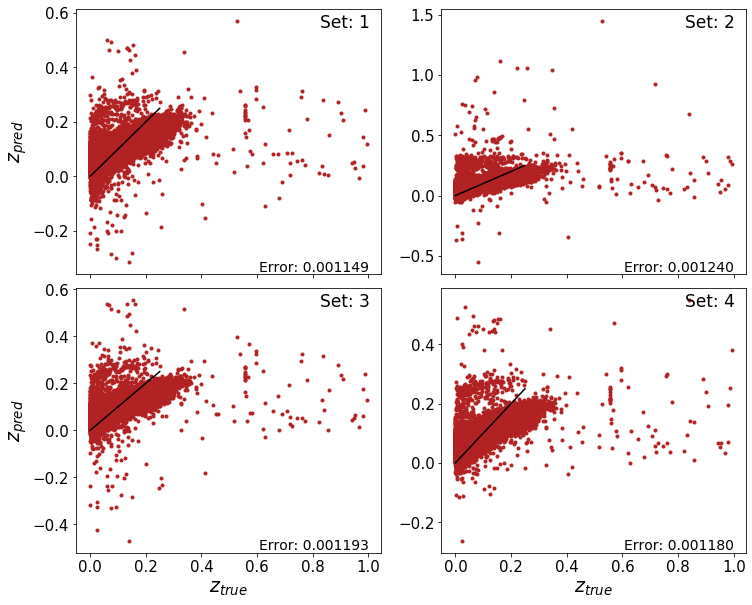

In [29]:
selector =[filter_col_01, filter_col_02, filter_col_03,filter_col_04]
min_selector_error = []
min_selector_indx = []

scaler = StandardScaler()
i=0

#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

f, ((axs1, axs2), (axs3, axs4)) = plt.subplots(nrows=2,ncols=2,sharex=True, figsize=(12,10),gridspec_kw={'hspace': 0.05})

for j in selector:
    i=i+1
#    X, y = data[j[1:]][data.z<0.3], data['z'][data.z<0.3]
    X, y = data[j[1:]], data['z']

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
    
#    print(X_train.shape)

    train_error = []
    test_error = []
    y_test_pred = []

    sgd_reg = make_pipeline(StandardScaler(), SGDRegressor(loss='squared_loss',max_iter=10000,random_state=0))#,  penalty=None, eta0=0.1))

    # Entreno los modelos

    sgd_reg.fit(X_train, y_train.ravel())

    # Predigo los valores de test
    y_train_pred = sgd_reg.predict(X_train)

    # Predigo los valores de train
    y_test_pred = sgd_reg.predict(X_test)

    # Error cuadratico medio entrenamiento
#    train_error.append(mean_squared_error(y_train, y_train_pred))

    # Error cuadratico medio test
#    print(y_test.shape,y_test_pred.shape )
    test_error.append(mean_squared_error(y_test, y_test_pred))

#    print("Error: %f"%(test_error[0]))
    min_selector_error.append(min(test_error))
    min_selector_indx.append(test_error.index(min(test_error)))


    # Grafico error
    vars()['axs'+str(i)].plot(y_test, y_test_pred, marker='.', color="firebrick", linestyle='None')
    vars()['axs'+str(i)].plot([0,0.25], [0,0.25], 'k-')
    
    vars()['axs'+str(i)].tick_params("y", labelsize=15)
    vars()['axs'+str(i)].tick_params("x", labelsize=15)

    vars()['axs'+str(i)].text(0.6, 0.01,"Error: %f"%(test_error[0]), transform=vars()['axs'+str(i)].transAxes, fontsize=14)
    vars()['axs'+str(i)].text(0.8, 0.93,"Set: %i"%(i), transform=vars()['axs'+str(i)].transAxes, fontsize=17)

    if i>2:
        vars()['axs'+str(i)].set_xlabel(r'$z_{true}$', fontsize=19)
    if i==1 or i==3:
        vars()['axs'+str(i)].set_ylabel(r'$z_{pred}$', fontsize=19)
#    plt.show()

print("Error minimo: %f"%(min_selector_error[0]))
f.savefig('/home/victoria/Documentos/Diplomatura/Mentoria/z_pred_vs_z_true_SGDRegressor.png')

**Notas:**    
* De los 4 set de datos, el primero y el cuarto set presentan los menores valores de error cuadrático. 
* Si comparamos los sets 1 y 4, en el primero tenemos 21 variables y en el cuarto tenemos 12 variables. 
* En el primer set solo se toman las magnitudes y colores model, y en el cuarto set se toma una mezcla entre los distintos sistemas de magnitudes. 

### Regularización  
Ridge Regression usa una regresión lineal pero le agrega el término de regularización L2 (con la constante alpha).  
<img src="images/CodeCogsEqn.gif">



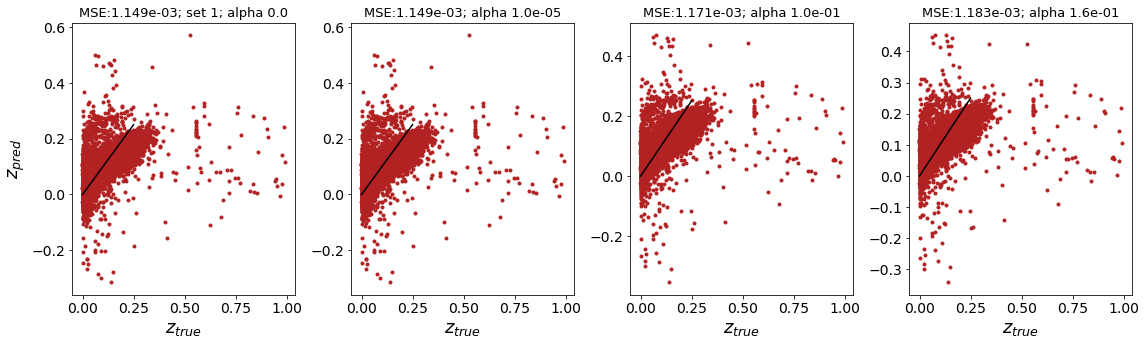

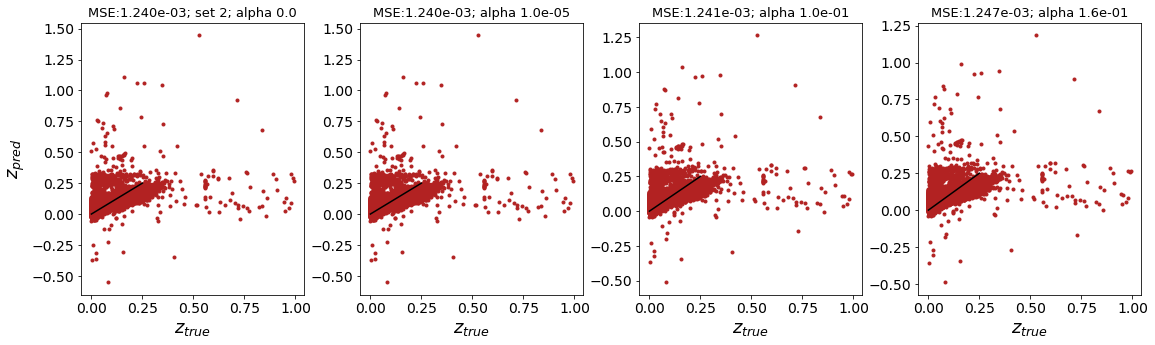

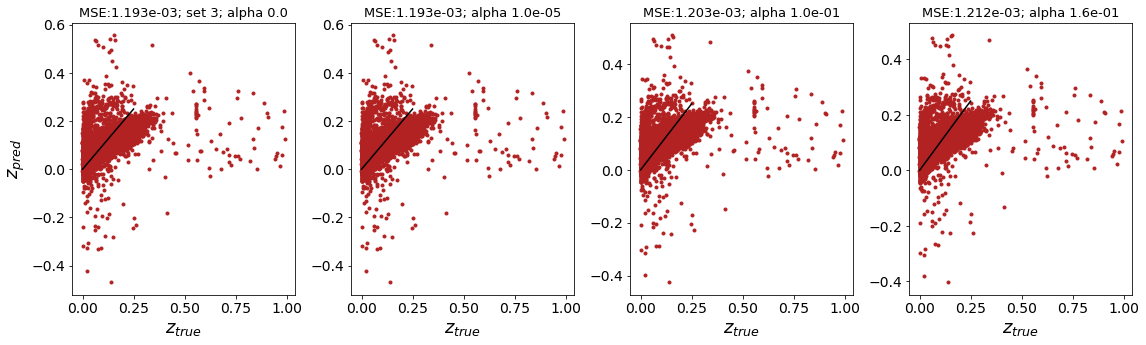

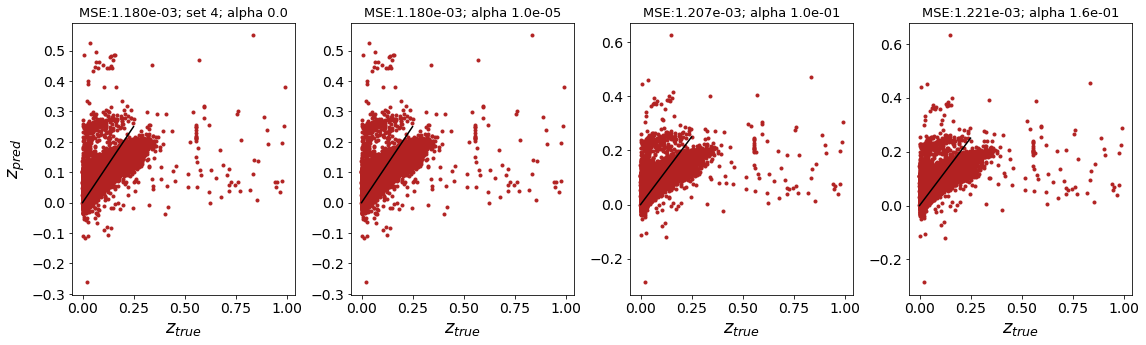

El error es minimo para el minimo: 0.001183


In [17]:
selector =[filter_col_01, filter_col_02, filter_col_03,filter_col_04]
min_selector_error = []
min_selector_indx = []

scaler = StandardScaler()
alphas = [0.0, 1e-5, 1e-1, 0.16]

for ind,j in enumerate(selector):
    h=0 
    X, y = data[j[1:]], data['z']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
    f, ax = plt.subplots(1, 4, figsize=(19, 5), gridspec_kw = {'wspace':0.25})

    for i in alphas:
        train_error = []
        test_error = []
        y_test_pred = []
        sgd_reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=10000, alpha=alphas[h], random_state=0))#,  penalty=None, eta0=0.1))

    # Entreno los modelos
        sgd_reg.fit(X_train, y_train.ravel())

    # Predigo los valores de test
        y_train_pred = sgd_reg.predict(X_train)

    # Predigo los valores de train
        y_test_pred = sgd_reg.predict(X_test)

    # Error cuadratico medio entrenamiento
#    train_error.append(mean_squared_error(y_train, y_train_pred))

    # Error cuadratico medio test
#    print(y_test.shape,y_test_pred.shape )
        test_error.append(mean_squared_error(y_test, y_test_pred))
    
#        print("MSE: %f"%(test_error[0]),"set %i"%(ind))

    # Grafico error
#        ax[h].plot(y_test, y_test_pred, marker='.', color="firebrick", linestyle='None')
        ax[h].plot(y_test, y_test_pred, marker='.', color="firebrick", linestyle='None')

        ax[h].plot([0,0.25], [0,0.25], 'k-')#, color="blue")
        ax[h].set_xlabel(r'$z_{true}$', fontsize=18)
        ax[h].tick_params(labelsize=14)

        if h==0:
            ax[h].set_ylabel(r'$z_{pred}$', fontsize=18)
            ax[h].set_title("MSE:%.3e"%(test_error[0])+"; set %i"%(ind+1)+"; alpha %.1f"%(alphas[h]), fontsize=13)
        else:
            ax[h].set_title("MSE:%.3e"%(test_error[0])+"; alpha %.1e"%(alphas[h]), fontsize=13)
#            ax[h].set_title("MSE:"+str(np.around(test_error[0],5))+"; alpha %.1e"%(alphas[h]), fontsize=13)
        h=h+1
    plt.show()
    min_selector_error.append(min(test_error))
    min_selector_indx.append(test_error.index(min(test_error)))
    
print("El error es minimo para el minimo: %f"%(min(min_selector_error)))#,"Correspondiente al set: %f"%(min(min_selector_error)) )

**Notas:** 
* La performance que se obtiene de los modelos utilizando distintos valores de penalizacion, no justifican su utilizancion.
* En los gràficos anteriores podemos observar, que para valores de z mayores a ~ 0.3, los modelo no tiene una buena performance. 
* Además se puede observar que el modelo predice valores negativos de z.

### Evaluación de la complejidad de los modelos

* modelo 1 = Set de 21 variables que incluyen las magnitudes y colores model_mag
* modelo 2 = Set de 21 variables que incluyen las magnitudes y colores petro_mag
* modelo 3 = Set de 11 variables. Es un set reducido respecto del set filter_col_01
* modelo 4= Set de 12 variables diferentes entre los distintos sistemas de magnitudes

* Los modelos mas simples son aquellos con menor cantidad de variables, pero aún así el modelo 1 es que nos dá mejor valore de error cuadrático.

### Discriminación por morfología de la galaxia


In [31]:
data_spiral = data[data['spiral'] == 1]
data_elliptical = data[data['elliptical'] == 1]
data_uncertain = data[data['uncertain'] == 1]
tipo=['spiral', 'elliptical','uncertain']

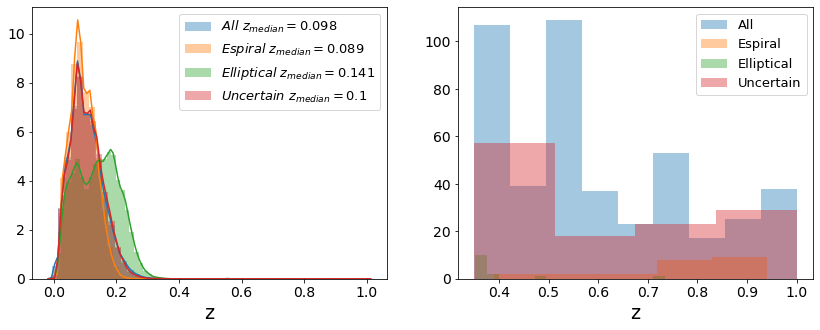

In [19]:
f, ax=plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.distplot(data['z'],ax=ax[0], kde=True, label=r'$All\,\, z_{median}=$'+str(np.around(np.median(data['z']),3)))
sns.distplot(data_spiral['z'],ax=ax[0], kde=True, label=r'$Espiral\,\, z_{median}=$'+str(np.around(np.median(data_spiral['z']),3)))
sns.distplot(data_elliptical['z'],ax=ax[0], kde=True, label=r'$Elliptical\,\, z_{median}=$'+str(np.around(np.median(data_elliptical['z']),3)))
sns.distplot(data_uncertain['z'],ax=ax[0], kde=True, label=r'$Uncertain\,\, z_{median}=$'+str(np.around(np.median(data_uncertain['z']),3)))

ax[0].set_xlabel('z', fontsize=19)
ax[0].tick_params(labelsize=14)
ax[0].legend(fontsize=13)

sns.distplot(data['z'][data['z']>0.35],ax=ax[1],kde=False, label='All')
sns.distplot(data_spiral['z'][data_spiral['z']>0.35],ax=ax[1],kde=False, label='Espiral')
sns.distplot(data_elliptical['z'][data_elliptical['z']>0.35],ax=ax[1],kde=False, label='Elliptical')
sns.distplot(data_uncertain['z'][data_uncertain['z']>0.35],ax=ax[1],kde=False, label='Uncertain')

ax[1].tick_params(labelsize=14)
ax[1].set_xlabel('z', fontsize=19)
ax[1].legend(fontsize=13)


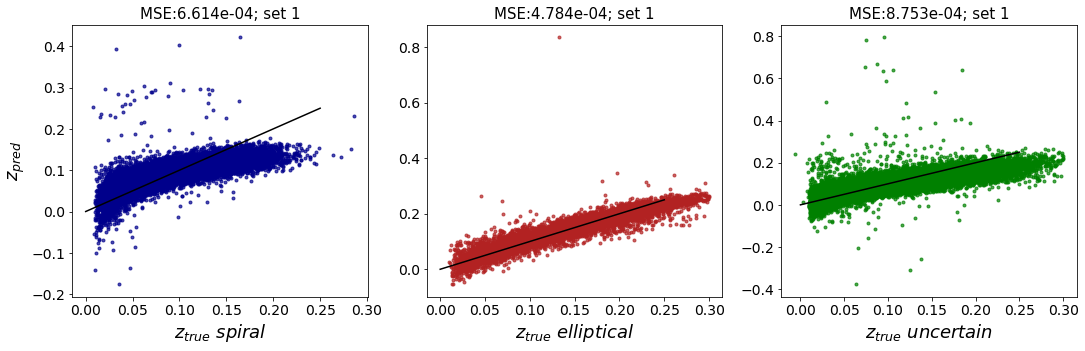

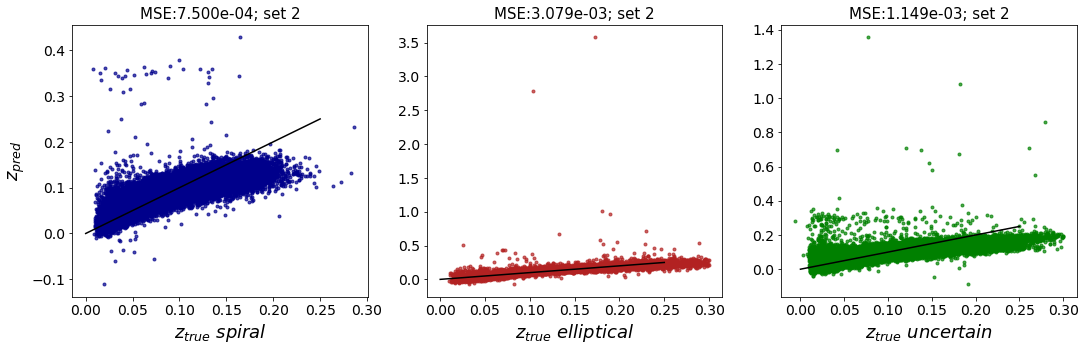

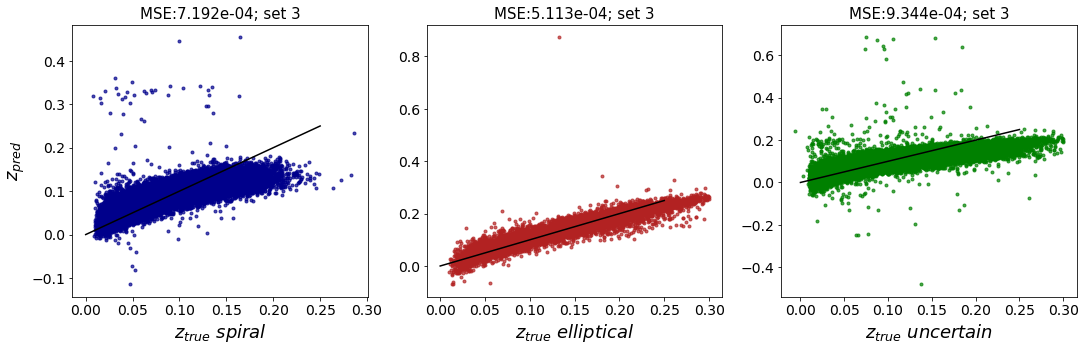

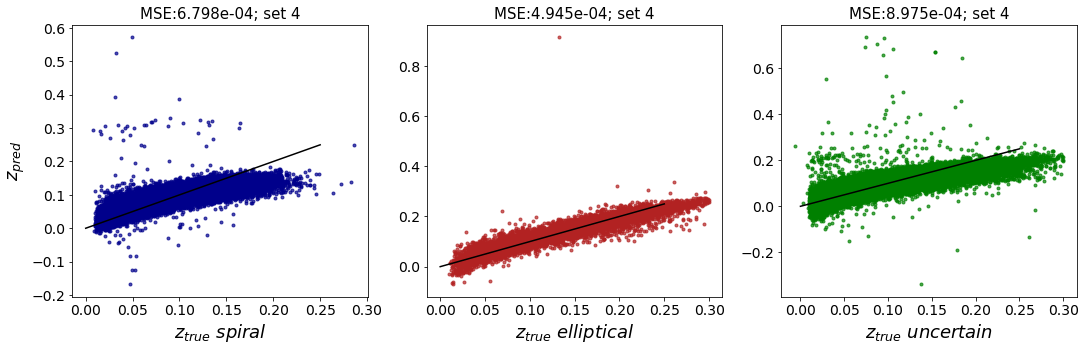

In [20]:
## Entrenamos el modelo con todo el rango de z y con los z < 0.3. 

selector =[filter_col_01, filter_col_02, filter_col_03, filter_col_04]
min_selector_error = []
min_selector_indx = []
scaler = StandardScaler()

tipo=['spiral', 'elliptical','uncertain']
c=['darkblue', 'firebrick','green']

for ind,j in enumerate(selector):
    h=0 

    f, ax = plt.subplots(1,3 , figsize=(18, 5))

    for m in tipo:
#       X, y = vars()['data_'+str(m)][j[1:]], vars()['data_'+str(m)]['z']
        X, y = vars()['data_'+str(m)][j[1:]][vars()['data_'+str(m)]['z']<0.3], vars()['data_'+str(m)]['z'][vars()['data_'+str(m)]['z']<0.3]

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

        train_error = []
        test_error = []
        y_test_pred = []

        sgd_reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=10000, alpha=1e-5, random_state=0))# Sacamos este valor de los graficos anteriores

        # Entreno los modelos
        sgd_reg.fit(X_train, y_train.ravel())

        # Predigo los valores de test
        y_train_pred = sgd_reg.predict(X_train)

        # Predigo los valores de train
        y_test_pred = sgd_reg.predict(X_test)

        # Error cuadratico medio entrenamiento
        train_error.append(mean_squared_error(y_train, y_train_pred))

        # Error cuadratico medio test
        test_error.append(mean_squared_error(y_test, y_test_pred))
 
        # Grafico error
        ax[h].plot(y_test, y_test_pred, '.', color=c[h], alpha=0.7)
        ax[h].plot([0,0.25], [0,0.25], 'k-')
        ax[h].tick_params(labelsize=14)
        ax[h].set_title("MSE:%.3e"%(test_error[0])+"; set %i"%(ind+1), fontsize=15)
        if h==0:
            ax[h].set_ylabel(r'$z_{pred}$', fontsize=18)

        if h==0:
            ax[h].set_xlabel(r'$z_{true}\,\, spiral$', fontsize=18)
            
        if h==1:
            ax[h].set_xlabel(r'$z_{true}\,\, elliptical$', fontsize=18)
            
        if h==2:
            ax[h].set_xlabel(r'$z_{true}\,\, uncertain$', fontsize=18)
    
        h=h+1
    plt.show()
    min_selector_error.append(min(test_error))
    min_selector_indx.append(test_error.index(min(test_error)))
    
#print("El error es minimo para el minimo: %f"%(min(min_selector_error)))#,"Correspondiente al set: %f"%(min(min_selector_error)) )




**Notas:** 
* Tomamos solo las galaxias con z menores a 0.3, a partir de la inspeccion previa de la distribucion del z discriminando por morfologia. 
* El primer set y el cuarto set, muestran nuevamente los mejores resultados. 
* Además podemos observar que para las galaxias elipticas las predicciones son mejores. 

## **3)** Emplear algunos (más de uno) de los modelos de clasificación (perceptrón, regresión logística, vecinos más cercanos) para clasificar las galaxias según su tipo, a partir de las variables elegidas.
* Computar las metricas accuracy,precision, recall, F1, matriz de confusión
* Visualización de la frontera de decisión
   

In [32]:
# Concatenamos los set de datos spiral, elliptical y uncertain
data_tipo = pd.concat([data_spiral, data_elliptical, data_uncertain])

In [22]:
data_tipo[:5]

,z,velDisp,ra,dec,subClass,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,...,subClass_STARFORMING_BROADLINE,subClass_null,modelColor_ug,modelColor_gr,modelColor_ri,modelColor_iz,petroColor_ug,petroColor_gr,petroColor_ri,petroColor_iz
specObjID,,,,,,,,,,,,,,,,,,,,,
957065537576265728,0.140137,138.90830,197.473340,4.417710,NaN,19.56201,18.19559,17.34286,16.92395,16.61079,...,0,1,1.36642,0.85273,0.41891,0.31316,1.07275,0.76730,0.36148,0.22301
637262958233151488,0.098105,135.15380,137.577476,2.613135,NaN,20.37811,18.37596,17.37777,16.95891,16.61865,...,0,1,2.00215,0.99819,0.41886,0.34026,1.87594,1.00148,0.41436,0.36765
637266806523848704,0.098102,112.93020,137.866935,3.050839,NaN,21.06598,18.83291,17.75186,17.16733,16.69356,...,0,1,2.23307,1.08105,0.58453,0.47377,1.55629,0.93613,0.56206,0.31988
657534650943563776,0.088232,49.05451,216.967778,4.175325,STARFORMING,18.77377,17.50497,16.98801,16.68087,16.50830,...,0,0,1.26880,0.51696,0.30714,0.17257,1.21089,0.47204,0.26622,0.14915
477392312498939904,0.127602,116.65900,22.041313,14.228646,STARFORMING,19.81958,18.42553,17.61714,17.16931,16.88651,...,0,0,1.39405,0.80839,0.44783,0.28280,1.10243,0.73495,0.37401,0.32365


In [33]:
# Subsets según el tipo morfológico de las galaxias: data['morfologia']
data_tipo['morfologia'] = 'uncertain'
data_tipo.loc[data['elliptical']==1, 'morfologia'] = 'elliptical'
data_tipo.loc[data['spiral']==1, 'morfologia'] = 'spiral'

In [34]:
# Filtramos las columnas de interès para el set de datos 1
data_filter = data_tipo[filter_col_01]

X, y = data_filter.iloc[:,:].values, data_tipo['morfologia']

# Dividimos el set de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)


### Primer Modelo: Clasificador SDGC 

In [35]:
model = SGDClassifier(random_state=0, shuffle = True)

model.fit(X_train,y_train)

SGDClassifier(random_state=0)

In [36]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [37]:
print('Train Accuracy: ', np.sum(y_train_pred == y_train)/len(y_train))
print('Test Accuracy: ', np.sum(y_test_pred == y_test)/len(y_test))

Train Accuracy:  0.6984362834010446
Test Accuracy:  0.6993762103215327


In [33]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[   72   177 10194]
 [   13 17089 15758]
 [   50  7112 61592]]


In [34]:
#import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta correcta')
    plt.xlabel('Etiqueta predicha')

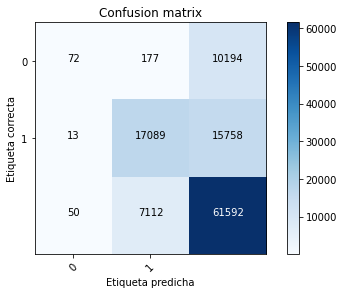

In [35]:
plot_confusion_matrix(cm, [0,1])

### Segundo Modelo: Perceptron

In [36]:
regr = MLPClassifier(hidden_layer_sizes=(35), max_iter=10000,
                   activation='relu', random_state = 0,
                   solver='lbfgs')
regr.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=35, max_iter=10000, random_state=0,
              solver='lbfgs')

In [37]:
#  Predicción (predict):
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

In [39]:
print('Train Accuracy: ', np.sum(y_train_pred == y_train)/len(y_train))
print('Test Accuracy: ', np.sum(y_test_pred == y_test)/len(y_test))

Train Accuracy:  0.7448301864903274
Test Accuracy:  0.7456562285265534


In [40]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[ 4665    24  5754]
 [   46 20377 12437]
 [ 2022  8218 58514]]


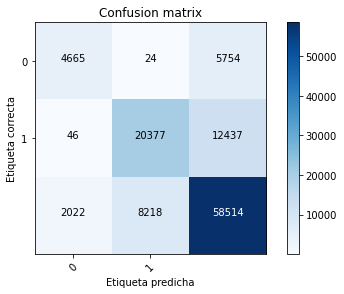

In [41]:
plot_confusion_matrix(cm, [0,1])

**Nota:**
* El modelo mejora sus aciertos, respecto del Clasificador SDGC